## **3) Úvod do lineární algebry**

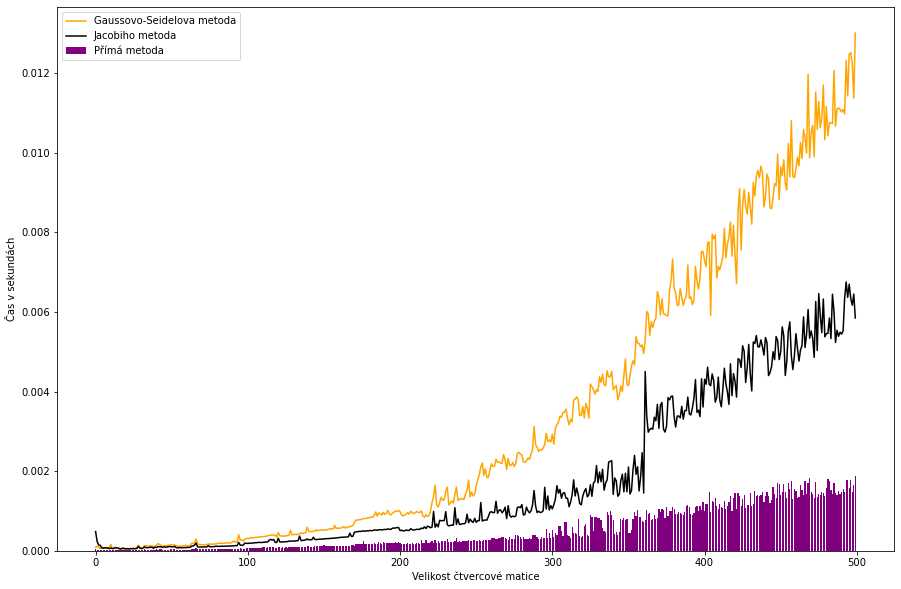

In [15]:
import time
import matplotlib.pyplot as plt
import numpy as np

def jacobi(A, b, niteraci, x0=None):
    if x0 is None:
        x0 = np.ones(len(A))
    x = x0
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    for _ in range(niteraci):
        x = (b - np.matmul((L + U),x))/D
    return x

def gauss_seidel(A, b, niteraci, x0=None):
    if x0 is None:
        x0 = np.ones(len(A))
    x = x0
    U = np.triu(A, k = 1)
    Lstar = np.tril(A, k = 0)               #D + L
    T = np.matmul(-np.linalg.inv(Lstar), U) #T = -invL* . U
    C = np.matmul(np.linalg.inv(Lstar), b)  #C = invL . b
    for _ in range(niteraci):
        x = np.matmul(T, x) + C             #inv(D+L).(b-U.x) = inv(Lstar).(b-U.x) = C + T => x = Tx + C
    return x

times = []
iter_times = []
iter2_times = []
matrix_size = []

for i in range(500):
    
    A = np.random.randint(1, 10, size=(i, i))
    b = np.random.randint(1, 10, size=i)

    np.fill_diagonal(A, 10000) # matice musí být diagonálně dominantní, aby konvergovalo
    t = time.perf_counter()

    # Přímá metoda
    solution = np.linalg.solve(A, b)
    times.append(time.perf_counter() - t)

    t = time.perf_counter()

    # Gaussovo-Seidelova metoda
    solution2 = gauss_seidel(A, b, 10)
    iter_times.append(time.perf_counter() - t)

    t = time.perf_counter()

    # Jacobiho metoda
    solution3 = jacobi(A, b, 10)
    iter2_times.append(time.perf_counter() - t)

    matrix_size.append(i)
    
plt.figure(figsize=(15, 10))
plt.bar(matrix_size, times, label="Přímá metoda", color="purple")
plt.plot(matrix_size, iter_times, label="Gaussovo-Seidelova metoda", color="orange")
plt.plot(matrix_size, iter2_times, label="Jacobiho metoda", color="black")
plt.xlabel('Velikost čtvercové matice')
plt.ylabel('Čas v sekundách')
plt.legend()
plt.show()